In [1]:
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import layers

from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
lb = LabelBinarizer()

import matplotlib.pyplot as plt
import random
import os
import numpy as np
np.set_printoptions(threshold=10000)
import cv2
import pickle

# 遍历所有文件名
def findAllFile(base):
    for root, ds, fs in os.walk(base):
        for f in fs:
            yield f

# 数据切分
def split_train(data,label,test_ratio):
    np.random.seed(43)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices =shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data[train_indices],data[test_indices],label[train_indices],label[test_indices]

image_dir = ("./train/cats/", "./train/dogs/", "./train/panda/")
image_path = []
data = []
labels = []

# 1、数据预处理
# 读取图像路径
for path in image_dir:
    for i in findAllFile(path):
        image_path.append(path+i)

# 随机化数据
random.seed(43)
random.shuffle(image_path)

# 读取图像数据，读取label文件名数据
for j in image_path:
    image = cv2.imread(j)
    image = cv2.resize(image,(32,32)).flatten()
    data.append(image)
    label = j.split("/")[-2]
    labels.append(label)

# 规格化数据
data = np.array(data,dtype="float") / 255.0
labels = np.array(labels)
# 数据切分
(trainX,testX,trainY,testY) = split_train(data,labels,test_ratio=0.25)
# 将cat、dog、panda规格化数据
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

# 最终数据结果
print(trainX)
print(data)
print(data.shape) # (3000, 3072)，32x32x3=3072，其图片3通道被拉长成一条操作
print(lb.classes_) # ['cats' 'dogs' 'panda']

[[0.09803922 0.14901961 0.16470588 ... 0.46666667 0.48235294 0.47058824]
 [0.58039216 0.69411765 0.81568627 ... 0.21568627 0.22352941 0.25098039]
 [0.08235294 0.19215686 0.09411765 ... 0.11372549 0.4627451  0.36862745]
 ...
 [0.6        0.63529412 0.65098039 ... 0.5254902  0.51372549 0.52156863]
 [0.80392157 0.95294118 0.94509804 ... 0.37254902 0.47843137 0.53333333]
 [0.49019608 0.57647059 0.55686275 ... 0.40392157 0.41176471 0.40784314]]
[[0.14509804 0.24313725 0.25882353 ... 0.17254902 0.40784314 0.3372549 ]
 [0.69019608 0.70196078 0.65882353 ... 0.10196078 0.14117647 0.13333333]
 [0.2627451  0.28627451 0.3254902  ... 0.28235294 0.23137255 0.38039216]
 ...
 [0.00784314 0.04705882 0.00784314 ... 0.17647059 0.43137255 0.21960784]
 [0.50588235 0.54509804 0.61568627 ... 0.69019608 0.71372549 0.76470588]
 [0.94901961 0.94901961 0.94901961 ... 0.40784314 0.44705882 0.4627451 ]]
(2995, 3072)
['cats' 'dogs' 'panda']


In [2]:
# 2、创建模型层
EPOCHS = 200
model = Sequential()
model.add(Dense(512,input_shape=(3072,),activation="relu",kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu",kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model.add(Dropout(0.5))
model.add(Dense(len(lb.classes_),activation="softmax",kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
# 损失函数和优化器，正则惩罚
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.001),metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=EPOCHS, batch_size=32)

Epoch 1/200


G:\ai\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


71/71 [==============================] - 1s 9ms/step - loss: 1.2464 - accuracy: 0.3347 - val_loss: 1.0598 - val_accuracy: 0.3864
Epoch 2/200
71/71 [==============================] - 0s 7ms/step - loss: 1.1835 - accuracy: 0.3649 - val_loss: 1.0435 - val_accuracy: 0.4104
Epoch 3/200
71/71 [==============================] - 0s 6ms/step - loss: 1.1509 - accuracy: 0.3854 - val_loss: 1.0284 - val_accuracy: 0.4572
Epoch 4/200
71/71 [==============================] - 0s 6ms/step - loss: 1.1288 - accuracy: 0.3894 - val_loss: 1.0149 - val_accuracy: 0.4545
Epoch 5/200
71/71 [==============================] - 0s 6ms/step - loss: 1.1071 - accuracy: 0.3934 - val_loss: 0.9989 - val_accuracy: 0.4947
Epoch 6/200
71/71 [==============================] - 0s 6ms/step - loss: 1.0868 - accuracy: 0.4108 - val_loss: 0.9923 - val_accuracy: 0.5000
Epoch 7/200
71/71 [==============================] - 0s 7ms/step - loss: 1.0724 - accuracy: 0.4215 - val_loss: 0.9895 - val_accuracy: 0.5187
Epoch 8/200
71/71 [======

Epoch 59/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8769 - accuracy: 0.5585 - val_loss: 0.8432 - val_accuracy: 0.5829
Epoch 60/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8679 - accuracy: 0.5563 - val_loss: 0.8499 - val_accuracy: 0.5856
Epoch 61/200
71/71 [==============================] - 1s 7ms/step - loss: 0.8738 - accuracy: 0.5398 - val_loss: 0.8425 - val_accuracy: 0.5829
Epoch 62/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8798 - accuracy: 0.5567 - val_loss: 0.8462 - val_accuracy: 0.5842
Epoch 63/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8688 - accuracy: 0.5607 - val_loss: 0.8463 - val_accuracy: 0.5882
Epoch 64/200
71/71 [==============================] - 1s 7ms/step - loss: 0.8646 - accuracy: 0.5705 - val_loss: 0.8375 - val_accuracy: 0.5869
Epoch 65/200
71/71 [==============================] - 1s 7ms/step - loss: 0.8819 - accuracy: 0.5532 - val_loss: 0.8389 - val_accuracy: 0.5842
Epoch 

71/71 [==============================] - 0s 7ms/step - loss: 0.8240 - accuracy: 0.5879 - val_loss: 0.7974 - val_accuracy: 0.6043
Epoch 117/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8046 - accuracy: 0.5866 - val_loss: 0.8019 - val_accuracy: 0.6016
Epoch 118/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8262 - accuracy: 0.5817 - val_loss: 0.7949 - val_accuracy: 0.6029
Epoch 119/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8076 - accuracy: 0.5972 - val_loss: 0.7972 - val_accuracy: 0.6056
Epoch 120/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8131 - accuracy: 0.5848 - val_loss: 0.7929 - val_accuracy: 0.6083
Epoch 121/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8121 - accuracy: 0.5848 - val_loss: 0.7922 - val_accuracy: 0.6016
Epoch 122/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8110 - accuracy: 0.5857 - val_loss: 0.7995 - val_accuracy: 0.6029
Epoch 123/200

71/71 [==============================] - 0s 6ms/step - loss: 0.7687 - accuracy: 0.6155 - val_loss: 0.7726 - val_accuracy: 0.6110
Epoch 174/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7660 - accuracy: 0.6097 - val_loss: 0.7765 - val_accuracy: 0.6217
Epoch 175/200
71/71 [==============================] - 1s 7ms/step - loss: 0.7768 - accuracy: 0.6097 - val_loss: 0.7690 - val_accuracy: 0.6230
Epoch 176/200
71/71 [==============================] - 0s 7ms/step - loss: 0.7758 - accuracy: 0.6101 - val_loss: 0.7758 - val_accuracy: 0.6203
Epoch 177/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7601 - accuracy: 0.6208 - val_loss: 0.7713 - val_accuracy: 0.6243
Epoch 178/200
71/71 [==============================] - 0s 7ms/step - loss: 0.7511 - accuracy: 0.6351 - val_loss: 0.7740 - val_accuracy: 0.6203
Epoch 179/200
71/71 [==============================] - 1s 7ms/step - loss: 0.7644 - accuracy: 0.6182 - val_loss: 0.7704 - val_accuracy: 0.6217
Epoch 180/200

In [3]:
# 3、模型评估
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

24/24 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

        cats       0.58      0.60      0.59       252
        dogs       0.49      0.53      0.51       236
       panda       0.83      0.73      0.78       260

    accuracy                           0.63       748
   macro avg       0.63      0.62      0.63       748
weighted avg       0.64      0.63      0.63       748



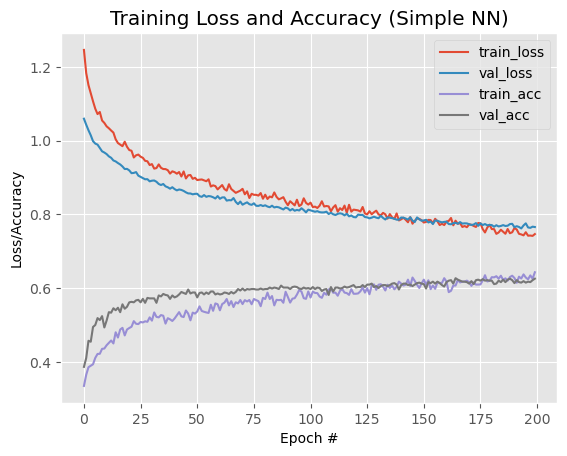

In [4]:
# 4、数据可视化
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("./plot.png")

In [5]:
# 5、保存模型到本地
model.save("./model")
f = open("./label.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

INFO:tensorflow:Assets written to: ./model\assets


In [20]:
# 6、测试模型
test_image_dir =  "./test/"
test_image_path = []
for i in findAllFile(test_image_dir):
    test_image_path.append(test_image_dir+i)
test_image = random.sample(test_image_path, 1)[0]

# 数据预处理
image = cv2.imread(test_image)
output = image.copy()
image = image.astype("float") / 255.0
image = cv2.resize(image,(32,32)).flatten()
image = image.reshape((1, image.shape[0]))

# 加载模型
model = load_model("./model")
lb = pickle.loads(open("./label.pickle", "rb").read())
# 开始预测
preds = model.predict(image)

# 查看预测结果
text1 = "{}: {:.2f}% ".format(lb.classes_[0], preds[0][0] * 100)
text2 = "{}: {:.2f}% ".format(lb.classes_[1], preds[0][1] * 100)
text3 = "{}: {:.2f}% ".format(lb.classes_[2], preds[0][2] * 100)
cv2.putText(output, text1, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
cv2.putText(output, text2, (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
cv2.putText(output, text3, (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
cv2.imshow("Image", output)
cv2.waitKey(0)

1/1 [==============================] - 0s 43ms/step


-1